In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_regression

In [3]:
X, y = make_regression(n_samples = 1000, n_features = 2, n_targets = 1, noise = 3.0)

In [4]:
X

array([[-0.49187763, -1.04352067],
       [ 0.43045105,  0.35935165],
       [-0.44454644, -1.61473207],
       ...,
       [ 1.10921847, -0.01857626],
       [ 0.08391828,  0.5998628 ],
       [-2.58643261,  0.12873591]])

In [5]:
y

array([-2.20780537e+01,  1.08829901e+01, -4.51327277e+01,  1.66234933e+00,
        9.05920679e+00, -3.77310303e+01,  2.19484039e+01,  1.71184017e+01,
       -3.18263664e+01, -3.50463169e+01, -5.33534097e+01,  8.51836040e+00,
        5.30476966e+00, -2.53584295e+01,  3.06553874e+01,  1.88331200e+01,
       -2.36352078e+01,  2.22101333e+01, -1.08873496e+01,  6.55616549e+01,
       -3.06024145e+01,  5.37964382e+00,  2.34336294e+01, -2.26915657e+01,
       -6.57385724e+00,  3.71599297e+01, -1.75222290e+01, -5.00896574e+01,
        1.88059176e+01,  1.66003194e+00, -2.07507822e+01,  1.35899367e+01,
        1.73070474e+01, -2.78943018e+01,  3.02959205e+01,  3.97071872e+01,
       -1.28651482e+01, -1.91860577e+00,  1.66980086e+01, -4.31845382e+00,
        3.63615656e+01, -1.20100792e+01,  7.86481155e+00, -3.62701529e+01,
       -4.25510099e+01,  1.32441447e+01,  8.09664936e+00,  1.92827599e+01,
        2.59161221e+01, -2.40763239e+00,  3.89360180e+01,  5.50603601e+01,
       -2.10921624e+01, -

<Axes: xlabel='0', ylabel='1'>

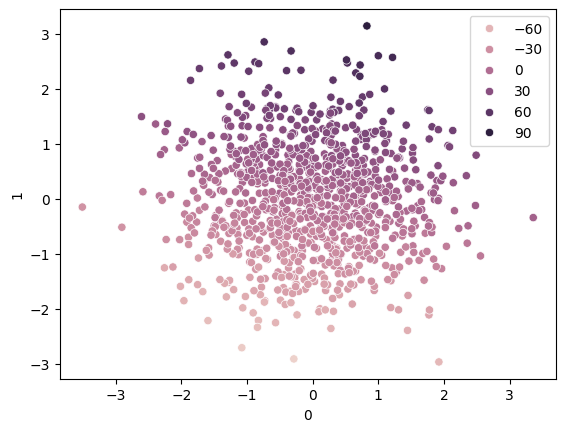

In [6]:
sns.scatterplot(x = pd.DataFrame(X)[0], y =pd.DataFrame(X)[1], hue = y)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [9]:
X_train.shape, X_test.shape

((700, 2), (300, 2))

In [11]:
from sklearn.svm import SVR

In [12]:
svr = SVR(kernel = 'linear')

In [13]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [14]:
svr.coef_

array([[ 5.83192879, 26.69789819]])

In [15]:
y_pred = svr.predict(X_test)

In [16]:
y_pred

array([-3.92294246e+01, -5.02575636e+01,  5.39142895e+01, -1.69426374e+01,
        1.05382477e+00, -5.31910514e+00, -2.18459359e+01,  2.95182876e+00,
       -1.81761937e+01,  2.70663665e-01,  3.66322295e-01,  4.12113548e+01,
       -4.18919989e+01,  4.04334190e+00, -2.33416968e+01, -1.39017691e+01,
       -1.33393203e+01,  1.86976919e+01,  1.04549119e+01,  8.77859275e+00,
       -2.87193573e+01, -1.42754824e+01, -4.58511914e+01,  3.08710992e+01,
        1.90686315e+01, -2.62157045e+00,  2.35470690e+01,  3.33101606e+01,
        3.48172223e+01,  4.41170466e+01, -5.23307096e+01, -2.60201056e+01,
        1.54495775e+01,  2.05784917e+01, -1.80932164e+01,  8.48653379e+00,
        9.49185738e+00,  1.05120978e+01,  1.37999505e+01,  2.61651349e+01,
       -5.18682615e+01,  2.23866228e+01,  1.19971328e+00, -2.15442026e+01,
        3.07158276e+01, -4.06264174e+01, -9.58198237e+00, -6.80671222e+00,
       -2.60157700e+01, -1.02618413e+01, -2.14593424e+01,  2.92590912e+01,
        1.43773112e+01,  

In [17]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9872622142925341

In [18]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

In [19]:
params = {'C' : [0.1, 0.2, 1, 2, 3, 10, 50, 100],
          'gamma' : [1, 0.1, 0.2, 0.001, 0.003],
          'kernel' : ['linear'],
          'epsilon' : [0.01, 0.1, 0.2, 0.3]
         }

In [20]:
grid = GridSearchCV(SVR(), param_grid = params, cv = 5, verbose = 3)

In [21]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV 1/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.979 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.983 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.974 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.983 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.984 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.979 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.983 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.974 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.983 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.984 total time=   0.0s
[CV 1/5] END C=0.1, epsilon

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 0.2, 1, 2, 3, 10, 50, 100],
                         'epsilon': [0.01, 0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=3)

In [22]:
grid.best_params_

{'C': 50, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [23]:
grid.best_score_

0.9870910741906472

In [24]:
y_pred = grid.predict(X_test)

In [27]:
r2_score(y_test, y_pred)

0.987175650931269